In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.rc('font',family = 'MicroSoft YaHei',weight = 'bold')

In [3]:
data = pd.read_csv(r'C:/Users/Lenovo-PC/Desktop/python爬取数据/链家北京租房数据.csv')
data

,Unnamed: 0,区域,小区名称,户型,面积(㎡),价格(元/月),位置
0,0,东城,万国城MOMA,1室0厅,59.11,10000,北京市东城区万国城MOMA
1,1,东城,北官厅胡同2号院,3室0厅,56.92,6000,北京市东城区北官厅胡同2号院
2,2,东城,和平里三区,1室1厅,40.57,6900,北京市东城区和平里三区
3,3,东城,菊儿胡同,2室1厅,57.09,8000,北京市东城区菊儿胡同
4,4,东城,交道口北二条35号院,1室1厅,42.67,5500,北京市东城区交道口北二条35号院
...,...,...,...,...,...,...,...
5768,8218,顺义,怡馨家园,3室1厅,114.03,5500,北京市顺义区怡馨家园
5769,8219,顺义,旭辉26街区,4室2卫,59.00,5000,北京市顺义区旭辉26街区
5770,8220,顺义,前进花园玉兰苑,3室1厅,92.41,5800,北京市顺义区前进花园玉兰苑
5771,8221,顺义,双裕小区,2室1厅,71.81,4200,北京市顺义区双裕小区


In [4]:
del data['Unnamed: 0']
data

,区域,小区名称,户型,面积(㎡),价格(元/月),位置
0,东城,万国城MOMA,1室0厅,59.11,10000,北京市东城区万国城MOMA
1,东城,北官厅胡同2号院,3室0厅,56.92,6000,北京市东城区北官厅胡同2号院
2,东城,和平里三区,1室1厅,40.57,6900,北京市东城区和平里三区
3,东城,菊儿胡同,2室1厅,57.09,8000,北京市东城区菊儿胡同
4,东城,交道口北二条35号院,1室1厅,42.67,5500,北京市东城区交道口北二条35号院
...,...,...,...,...,...,...
5768,顺义,怡馨家园,3室1厅,114.03,5500,北京市顺义区怡馨家园
5769,顺义,旭辉26街区,4室2卫,59.00,5000,北京市顺义区旭辉26街区
5770,顺义,前进花园玉兰苑,3室1厅,92.41,5800,北京市顺义区前进花园玉兰苑
5771,顺义,双裕小区,2室1厅,71.81,4200,北京市顺义区双裕小区


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5773 entries, 0 to 5772
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   区域       5773 non-null   object 
 1   小区名称     5773 non-null   object 
 2   户型       5773 non-null   object 
 3   面积(㎡)    5773 non-null   float64
 4   价格(元/月)  5773 non-null   int64  
 5   位置       5773 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 270.7+ KB


In [6]:
data = data.drop_duplicates(keep='first')
data = data.dropna()
data

,区域,小区名称,户型,面积(㎡),价格(元/月),位置
0,东城,万国城MOMA,1室0厅,59.11,10000,北京市东城区万国城MOMA
1,东城,北官厅胡同2号院,3室0厅,56.92,6000,北京市东城区北官厅胡同2号院
2,东城,和平里三区,1室1厅,40.57,6900,北京市东城区和平里三区
3,东城,菊儿胡同,2室1厅,57.09,8000,北京市东城区菊儿胡同
4,东城,交道口北二条35号院,1室1厅,42.67,5500,北京市东城区交道口北二条35号院
...,...,...,...,...,...,...
5768,顺义,怡馨家园,3室1厅,114.03,5500,北京市顺义区怡馨家园
5769,顺义,旭辉26街区,4室2卫,59.00,5000,北京市顺义区旭辉26街区
5770,顺义,前进花园玉兰苑,3室1厅,92.41,5800,北京市顺义区前进花园玉兰苑
5771,顺义,双裕小区,2室1厅,71.81,4200,北京市顺义区双裕小区


### 数据分析

#### 创建一个新表

In [7]:
df_area_count = pd.DataFrame(columns={'区域','房屋数量'})
df_area_count

,区域,房屋数量


In [8]:
df_area_count_gb = data['区域'].groupby(data['区域']).count().sort_values(ascending = False)

In [9]:
df_area_count['区域'] = df_area_count_gb.index
df_area_count['房屋数量'] = df_area_count_gb.values
df_area_count

,区域,房屋数量
0,朝阳,1597
1,海淀,605
2,丰台,577
3,通州,477
4,西城,442
5,大兴,362
6,昌平,347
7,顺义,297
8,门头沟,285
9,东城,282


#### 户型数据分析

In [10]:
df_housetype_count = pd.DataFrame(columns={'户型','户型数量'})
df_housetype_count

,户型,户型数量


In [11]:
df_housetype_count_gb = data['户型'].groupby(data['户型'],as_index=False).count()

TypeError: as_index=False only valid with DataFrame

In [28]:
df_housetype_count['户型'] = df_housetype_count_gb.index
df_housetype_count['户型数量'] = df_housetype_count_gb.values
df_housetype_count=df_housetype_count[df_housetype_count['户型数量']>50]
df_housetype_count

ValueError: Length of values (53) does not match length of index (11)

In [25]:
df_housetype_count['户型']

2     1室0厅
3     1室1卫
4     1室1厅
8     2室1卫
9     2室1厅
11    2室2厅
15    3室1卫
16    3室1厅
18    3室2厅
22    4室1厅
24    4室2厅
Name: 户型, dtype: object

In [26]:
df_housetype_count['户型数量']

2      244
3      126
4      844
8      120
9     2249
11     265
15      92
16     766
18     489
22      58
24     191
Name: 户型数量, dtype: int64

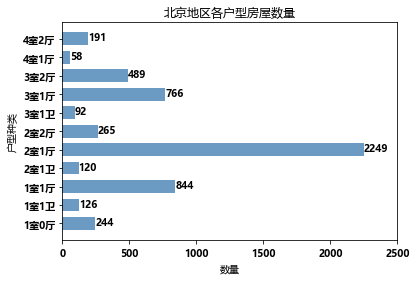

In [30]:
house_type = df_housetype_count['户型']
house_type_num = df_housetype_count['户型数量']
plt.barh(range(11),house_type_num,height=0.7,color = 'steelblue',alpha=0.8)
plt.yticks(range(11),house_type)
plt.xlim(0,2500)
plt.xlabel('数量')
plt.ylabel('户型种类')
plt.title('北京地区各户型房屋数量')
for x,y in enumerate(house_type_num):
    plt.text(y+0.2,x-0.1,'%0.f'%y)
plt.show()

#### 各区域平均租金分析

In [34]:
sum_price = data['价格(元/月)'].groupby(data['区域']).sum()
sum_area = data['面积(㎡)'].groupby(data['区域']).sum()
df_area_price = pd.DataFrame(columns={'区域','房屋数量','总面积','平均租金(元)'})
df_area_price['区域'] = sum_price.index
df_area_price['总金额'] = sum_price.values
df_area_price['总面积'] = sum_area.values
df_area_price['平均租金(元)'] = (sum_price.values/sum_area.values).round(2)
df_area_price = pd.merge(df_area_count,df_area_price)
df_area_price = df_area_price.loc[:,['区域','房屋数量','总金额','总面积','平均租金(元)']]
df_area_price

,区域,房屋数量,总金额,总面积,平均租金(元)


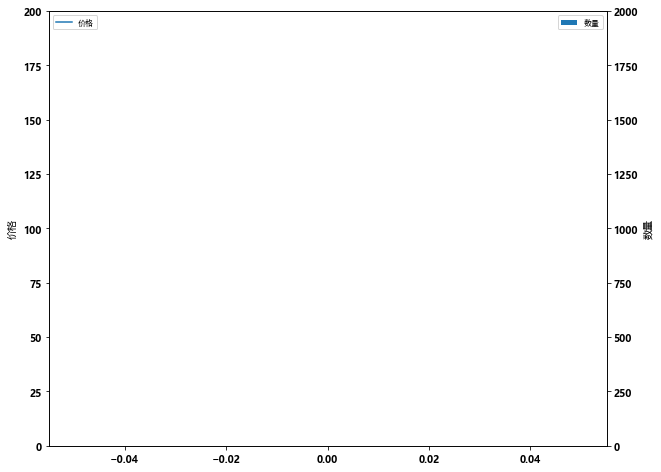

In [36]:
import matplotlib.ticker as mtick
from matplotlib.font_manager import FontProperties
num=df_area_price['房屋数量']
price=df_area_price['平均租金(元)']
l=(i for i in range(13))
lx=df_area_price['区域']
fig=plt.figure(figsize=(10,8))
ax1=fig.add_subplot(111)
plt.xticks(rotation=0)
ax1.plot(lx,price,label='价格')
for i,(_x,_y) in enumerate(zip(l,price)):
    plt.text(_x,_y,price[i],color='black',fontsize=10)
ax1.set_ylim([0,200])
ax1.set_ylabel('价格')
plt.legend(prop={'family':'SimHei','size':8},loc='upper left')
ax2=ax1.twinx()
plt.bar(lx,num,alpha=0.3,color='g',label="数量")
ax2.set_ylim([0,2000])
ax2.set_ylabel('数量')
plt.legend(prop={'family':'SimHei','size':8},loc='upper right')
plt.show()

In [37]:
mj_max=data['面积(㎡)'].max()
mj_min=data['面积(㎡)'].min()
price_max=data['价格(元/月)'].max()
price_min=data['价格(元/月)'].min()
print('房屋面积最大值为{}平方米'.format(mj_max))
print('房屋面积最小值为{}平方米'.format(mj_min))
print('房屋价格最大值为{}元'.format(price_max))
print('房屋价格最小值为{}元'.format(price_min))

房屋面积最大值为1133.0平方米
房屋面积最小值为11.63平方米
房屋价格最大值为150000元
房屋价格最小值为566元


In [38]:
area_divide=[1,30,50,70,90,120,140,160,1200]
area_cut=pd.cut(list(data['面积(㎡)']),area_divide)
area_cut_data=area_cut.describe()
area_cut_data

,counts,freqs
categories,,
"(1, 30]",41,0.007102
"(30, 50]",710,0.122986
"(50, 70]",1566,0.271263
"(70, 90]",1094,0.189503
"(90, 120]",1082,0.187424
"(120, 140]",381,0.065997
"(140, 160]",274,0.047462
"(160, 1200]",625,0.108263


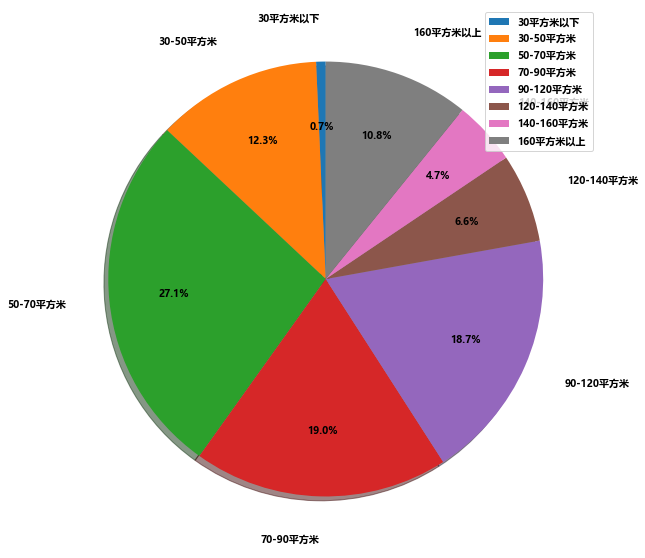

In [41]:
plt.figure(figsize=(10,10))
area_percentage=(area_cut_data['freqs'].values)*100
np.set_printoptions(precision=2)
labels=['30平方米以下','30-50平方米','50-70平方米','70-90平方米','90-120平方米','120-140平方米','140-160平方米','160平方米以上']
plt.axes(aspect=1)
plt.pie(x=area_percentage,labels=labels,autopct='%.1f%%',shadow=True,labeldistance=1.2,startangle=90,pctdistance=0.7)
plt.legend(loc='upper right')
plt.show()